**Bag of Words Algorithm Implementation**

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec
import pandas as pd
import numpy as np

In [ ]:

''' vectorize() function takes list of words in a sentence as input
    and returns a vector of size of filtered_vocab.It puts 0 if the
    word is not present in tokens and count of token if present.'''

def vectorize(tokens):
    vector=[]
    for w in filtered_vocab:
        vector.append(tokens.count(w))
    return vector



In [ ]:
'''unique() functions returns a list in which the order remains
    same and no item repeats.Using the set() function does not
    preserve the original ordering,so i didnt use that instead'''

def unique(sequence):
    seen = set()
    return [x for x in sequence if not (x in seen or seen.add(x))]
#create a list of stopwords.You can import stopwords from nltk too
stopwords=["to","was","a"]
#list of special characters.You can use regular expressions too
special_char=[",",":"," ",";",".","?"]


In [ ]:
string1 = "Data science is fun and interesting"
string2 = "Data science is fun"
string3 = "science is interesting"

#converting strings to lower case
string1=string1.lower()
string2=string2.lower()
string3=string3.lower()

#split the sentences into tokens
tokens1=string1.split()
tokens2=string2.split()
tokens3=string3.split()

print(tokens1)
print(tokens2)
print(tokens3)


['data', 'science', 'is', 'fun', 'and', 'interesting']
['data', 'science', 'is', 'fun']
['science', 'is', 'interesting']


In [ ]:
#create a vocabulary list
vocab=unique(tokens1+tokens2+tokens3)
print(vocab)


#filter the vocabulary list
filtered_vocab=[]

for w in vocab:
    if w not in stopwords and w not in special_char:
        filtered_vocab.append(w)
print("Final filtered vocabulary: ", filtered_vocab)



#convert sentences into vectords
vector1=vectorize(tokens1)
print("Sentence 1 vector :",vector1)

vector2=vectorize(tokens2)
print("Sentence 2 vector :",vector2)

vector3=vectorize(tokens3)
print("Sentence 3 vector :",vector3)

['data', 'science', 'is', 'fun', 'and', 'interesting']
Final filtered vocabulary:  ['data', 'science', 'is', 'fun', 'and', 'interesting']
Sentence 1 vector : [1, 1, 1, 1, 1, 1]
Sentence 2 vector : [1, 1, 1, 1, 0, 0]
Sentence 3 vector : [0, 1, 1, 0, 0, 1]


**Creating Bag of Words using sklearn library**

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

string1 = "Data science is fun and interesting"
string2 = "Data science is fun"
string3 = "science is interesting"
string4 = "data is interesting"

doc = string1+string2+string3+string4

CountVec = CountVectorizer(ngram_range=(1,1))
#transform
Count_data = CountVec.fit_transform([string1,string2,string3,string4])

#create dataframe
# Use get_feature_names_out() instead of get_feature_names()
cv_dataframe=pd.DataFrame(Count_data.toarray(),columns=CountVec.get_feature_names_out())
print(cv_dataframe)

   and  data  fun  interesting  is  science
0    1     1    1            1   1        1
1    0     1    1            0   1        1
2    0     0    0            1   1        1
3    0     1    0            1   1        0


Note that the CountVectorize sorts the vocabulary alphabetically before generating vectors.

**Count Occurrence**

In [ ]:

count_vec = CountVectorizer()
count_occurs = count_vec.fit_transform([doc])
count_occur_df = pd.DataFrame((count, word) for word, count in zip(count_occurs.toarray().tolist()[0], count_vec.get_feature_names_out()))
count_occur_df.columns = ['Word', 'Count']
count_occur_df.sort_values('Count', ascending=False, inplace=True)
count_occur_df.head()


,Word,Count
6,is,4
5,interestingdata,2
7,science,2
0,and,1
1,data,1


TF-IDF

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
corpus = ['Natural language processing is fun and interesting',
          'Natural language processing is fun',
          'Hindi language is interesting' ]

In [ ]:
#creating a word set for the corpus
words_set = set()

for doc in  corpus:
    words = doc.split(' ')
    words_set = words_set.union(set(words))

print('Number of words in the corpus:',len(words_set))
print('The words in the corpus: \n', words_set)


Number of words in the corpus: 8
The words in the corpus: 
 {'Hindi', 'language', 'is', 'processing', 'Natural', 'and', 'fun', 'interesting'}


**Computing Term Frequency**

In [ ]:
#creating a dataframe by the number of documents in the corpus and the word set, and use that information to compute the term frequency (TF)
n_docs = len(corpus)         #·Number of documents in the corpus
n_words_set = len(words_set) #·Number of unique words in the

print(n_docs)
print(n_words_set)

# Convert words_set to a list explicitly before creating the DataFrame.
df_tf = pd.DataFrame(np.zeros((n_docs, n_words_set)), columns=list(words_set))

# Compute Term Frequency (TF)
for i in range(n_docs):
    words = corpus[i].split(' ') # Words in the document
    for w in words:
        df_tf.loc[i, w] = df_tf.loc[i, w] + (1 / len(words)) # Use .loc for indexing

df_tf

3
8


,Hindi,language,is,processing,Natural,and,fun,interesting
0,0.00,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857
1,0.00,0.200000,0.200000,0.200000,0.200000,0.000000,0.200000,0.000000
2,0.25,0.250000,0.250000,0.000000,0.000000,0.000000,0.000000,0.250000


**Computing Inverse Document Frequency**

In [ ]:
print("IDF of: ")

idf = {}

for w in words_set:
    k = 0    # number of documents in the corpus that contain this word

    for i in range(n_docs):
        if w in corpus[i].split():
            k += 1

    idf[w] =  np.log10(n_docs / k)

    print(f'{w:>15}: {idf[w]:>10}' )


IDF of: 
          Hindi: 0.47712125471966244
       language:        0.0
             is:        0.0
     processing: 0.17609125905568124
        Natural: 0.17609125905568124
            and: 0.47712125471966244
            fun: 0.17609125905568124
    interesting: 0.17609125905568124


Note the IDF value of the word "is"

Computing TF-IDF

In [ ]:

df_tf_idf = df_tf.copy()

for w in words_set:
    for i in range(n_docs):
        df_tf_idf[w][i] = df_tf[w][i] * idf[w]

df_tf_idf

<ipython-input-15-affdefbf65e4>:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_tf_idf[w][i] = df_tf[w][i] * idf[w]


,Hindi,language,is,processing,Natural,and,fun,interesting
0,0.00000,0.0,0.0,0.025156,0.025156,0.06816,0.025156,0.025156
1,0.00000,0.0,0.0,0.035218,0.035218,0.00000,0.035218,0.000000
2,0.11928,0.0,0.0,0.000000,0.000000,0.00000,0.000000,0.044023


**word2vec Implementation using Gensim Library**

In [ ]:

#Importing dependancies
from gensim.models import Word2Vec, FastText
import pandas as pd
import re

from sklearn.decomposition import PCA

from matplotlib import pyplot as plt
import plotly.graph_objects as go

import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [ ]:

sentences = [['Natural', 'language', 'processing', 'is', 'fun', 'and', 'interesting'],
           ['Natural', 'language', 'processing', 'is', 'fun'],
           ['Hindi', 'language', 'is', 'interesting']]


Note that the sentences have been tokenized since we want to generate embeddings at the word level, not by sentence. Now we can run the sentences through the word2vec model.

In [ ]:
# train word2vec model
# The 'size' argument has been replaced with 'vector_size' and 'alpha' with 'learning_rate'
#w2v = Word2Vec(sentences, vector_size=2, learning_rate=0.025)
w2v = Word2Vec(sentences, min_count=1, vector_size=2) # Changed 'size' to 'vector_size' here as well

#print(w2v)


# train word2vec model
#w2v = Word2Vec(sentences, vector_size=2, alpha=0.025, min_count=1) #Combined the parameters into one call
#w2v = Word2Vec(sentences, min_count=1, vector_size=2)  Removed redundant call

print(w2v)

Word2Vec<vocab=8, vector_size=2, alpha=0.025>


When printed, the model displays the count of unique vocab words, array size and learning rate (default .025)

In [ ]:
# access vector for one word
print(w2v.wv['interesting'])

#list the vocabulary words
words = list(w2v.wv.key_to_index)  # Use key_to_index to get vocabulary as a dictionary

print(words)

#or show the dictionary of vocab words
w2v.wv.key_to_index  # Use key_to_index instead of vocab



[-0.4651475  -0.35584044]
['is', 'language', 'interesting', 'fun', 'processing', 'Natural', 'Hindi', 'and']


{'is': 0,
 'language': 1,
 'interesting': 2,
 'fun': 3,
 'processing': 4,
 'Natural': 5,
 'Hindi': 6,
 'and': 7}

VISUALIZE EMBEDDINGS

[[-0.02681136  0.01182157]
 [ 0.25516748  0.45046365]
 [-0.4651475  -0.35584044]
 [ 0.32294363  0.4486494 ]
 [-0.2507714  -0.18816859]
 [ 0.36902523 -0.07667357]
 [-0.22683066  0.32770258]
 [-0.24300802 -0.09080088]]
[[-0.03283524 -0.04343092]
 [ 0.47430357  0.07793243]
 [-0.603679   -0.00533429]
 [ 0.52196014  0.02970641]
 [-0.33290127 -0.0327271 ]
 [ 0.19157161 -0.38130584]
 [ 0.04147791  0.32299238]
 [-0.2598977   0.03216682]]
['is', 'language', 'interesting', 'fun', 'processing', 'Natural', 'Hindi', 'and']


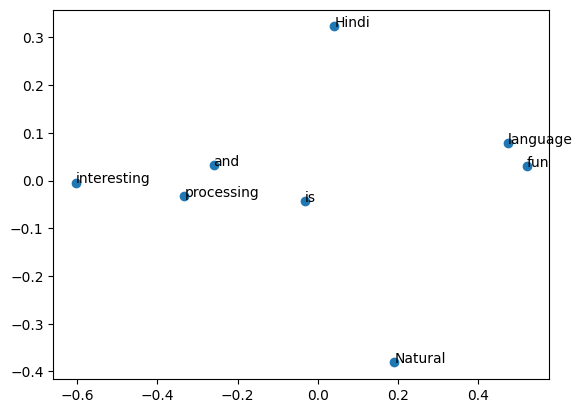

In [ ]:
X = w2v.wv[list(w2v.wv.key_to_index)] # Get word vectors using key_to_index
print(X)
pca = PCA(n_components=2)

result = pca.fit_transform(X)
print(result)

# create a scatter plot of the projection
plt.scatter(result[:, 0], result[:, 1])
words = list(w2v.wv.key_to_index)
print(words)

for i, word in enumerate(words):
   plt.annotate(word, xy=(result[i, 0], result[i, 1]))

plt.show()